Rappel du contexte : 

Nous sommes en projet pour rakuten pour résoudre la problématique de fixation de prix. 

Nous avons initialement tenté d'obtenir des données pertinentes en effectuant du Web Scrapping sur Rakuten. Nous avons rencontré une problématique :
- Manque d'information nootamment sur l'historiques et la temporallité nécessaires à l'étude de la variation des prix. 


Cela représente un obstacle conséquent et la générationd e données synthétique est devenu une solution incontournable :
- Modélisation de divers scénarios de prix en fonction de la saisonnalité, promotion, demande et des événement économiques spécifiques... 
- imitation des variation de prix observées dans le monde réel, ce qui est essentiel pour tester notre modèle de manière réaliste. 
- Contrôle total de la données : introduction d'anomalie ou ajout de tendance spécifique pour vérifier la robustesse de nos algorithmes. 
- Scraping peut soulever des questions légales ce qui élimine cet préocupation
- Le volume et la vriété des données est ajustable


Pour générer des données synthétiques, nous pouvons introduire des variations sur les prix des produits en fonction de différents facteurs comme la saisonnalité, la demande, etc. Voici quelques idées de variations :

- Saisonnalité : certains produits peuvent avoir des prix plus élevés ou plus bas à certaines périodes de l'année (par exemple, les produits liés aux fêtes de fin d'année).
- Fortes demandes : les prix peuvent augmenter lors de périodes de forte demande (par exemple, les nouveaux lancements de produits).
- Promotions et réductions : les prix peuvent baisser lors de périodes de soldes ou de promotions.
- Inflation ou déflation : les prix peuvent augmenter ou diminuer légèrement sur une longue période en raison de l'inflation ou de la déflation.

La génération de données synthétiques doit respecter plusieurs règles pour garantir que les données créées sont réalistes et utiles pour les analyses ultérieures.
- Réalisme : variations de prix doivent être réalistes et basées sur des facteurs réels comme la saisonnalité, les fortes demandes, les promotions, l'inflation, et les événements exceptionnels. Dans le script, les fonctions de variation de prix utilisent des multiplicateurs réalistes basés sur des observations courantes (par exemple, une augmentation de prix de 10-30% en décembre pour les produits de fête).

- Aléatoire contrôlé : variations doivent introduire de l'aléatoire pour simuler des fluctuations naturelles mais de manière contrôlée pour rester dans des limites réalistes. Le script utilise np.random.uniform pour introduire de l'aléatoire dans les multiplicateurs de prix, mais les bornes de ces multiplicateurs sont définies pour rester réalistes.

- Consistance : données doivent rester cohérentes avec les caractéristiques des produits et les comportements de marché. Le script applique les mêmes règles de variation de prix de manière cohérente pour tous les produits et sur tous les mois de l'année.

- Diversité : variations doivent couvrir différents scénarios pour permettre des analyses variées. Le script couvre plusieurs types de variations : saisonnalité, fortes demandes, promotions, inflation, événements exceptionnels, et variations régionales.

- Documenté et traçable : règles de génération doivent être bien documentées pour comprendre comment les données ont été créées. Le script documente chaque fonction de variation avec des commentaires expliquant les logiques derrière les variations.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

Notre jeu de donnée est récupéré sur Kaggle ( https://www.kaggle.com/datasets/promptcloud/amazon-france-product-dataset )
C'est un jeu de données qui reprends les produits, caractéristique, date et prix de Amazon. 

Amazon étant aussi une platefome de e-commerce, l'analyse initial semble pertinente pour entrainer notre modèle. A défault de possédé des données interne de Rakuten. 
Nous partons dans l'optique qui si nous étions en interne, nous pourrions récuperer ce genre de doonnées. 


In [2]:
df = pd.read_csv('data_initial.tsv', sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Uniq Id                          30000 non-null  object 
 1   Crawl Timestamp                  30000 non-null  object 
 2   Dataset Origin                   0 non-null      float64
 3   Product Id                       30000 non-null  object 
 4   Product Barcode                  17 non-null     object 
 5   Product Company Type Source      30000 non-null  object 
 6   Product Brand Source             0 non-null      float64
 7   Product Brand Normalised Source  0 non-null      float64
 8   Product Name Source              0 non-null      float64
 9   Match Rank                       0 non-null      float64
 10  Match Score                      0 non-null      float64
 11  Match Type                       0 non-null      float64
 12  Retailer          

La colonne 'Product Price' n'est pas au bon format pour la réalisation de nos futures fonctions de variaton. 

In [4]:
df['Product Price'] = df['Product Price'].str.replace('[\$,]', '', regex=True)

In [5]:
df['Product Price'] = df['Product Price'].astype(float)

In [6]:
print(df['Product Price'].dtype)

float64


# Fonction pour générer variation prix en fonction du type de variation

## Saisonnalité et forte demande
- Les produits peuvent avoir des prix + élevés en pour les fêtes de fin d'année (décembre) et plus bas en janvier
- Produit peuvent avoir des prix + élevés en juillet / août en raison des vancances

In [7]:
def apply_seasonality(base_price, month):
    if month in [12]:
        return base_price * np.random.uniform(1.1, 1.3)
    elif month in [1]:
        return base_price * np.random.uniform(0.7, 0.9)
    elif month in [7, 8]:
        return base_price * np.random.uniform(1.05, 1.2)
    return base_price

## Promotions, réductions et soldes
Les produits peuvent avoir des prix plus bas pendant :
- les promotions de novembre (Black Friday)
- soldes en France en 2020 :
    - Soldes d'hiver : 8 janvier au 4 février 2020
    - Soldes d'été : 15 juillet au 11 août 2020




In [8]:
def apply_promotions(base_price, date):
    # Définir les périodes de soldes hiver et été
    soldes_hiver = pd.date_range(start='2020-01-08', end='2020-02-04')
    soldes_ete = pd.date_range(start='2020-07-15', end='2020-08-11')
    
    # Vérifier si la date est dans les soldes hiver ou été
    if date in soldes_hiver or date in soldes_ete:
        return base_price * np.random.uniform(0.7, 0.95)
    
    # Vérifier si le mois est novembre
    if date.month == 11:
        return base_price * np.random.uniform(0.8, 0.95)

    
    # Retourner le prix de base si aucune promotion ne s'applique
    return base_price

## Inflation ou déflation


Les prix peuvent fluctuer légèrement chaque mois en raison de l'inflation ou de la déflation.

Voici d'après l'insse (https://www.insee.fr/fr/statistiques/5010784#tableau-ipc-g1-fr) les variations de prix à la consomation sur 2020
|mois|taux|
|----|----|
| 1 | 1.5 |
| 2 | 1.4 |
| 3 | 0.7 |
| 4 | 0.3 |
| 5 | 0.4 |
| 6 | 0.2 |
| 7 | 0.8 |
| 8 | 0.2 |
| 9 | 0.0 |
| 10 | 0.0 |
| 11 | 0.2 |
| 12 | 0.0 |

In [9]:
monthly_variations = {
    1: 1.5,
    2: 1.4,
    3: 0.7,
    4: 0.3,
    5: 0.4,
    6: 0.2,
    7: 0.8,
    8: 0.2,
    9: 0.0,
    10: 0.0,
    11: 0.2,
    12: 0.0
}
def apply_inflation(base_price, month):
    variation = monthly_variations.get(month, 1.0)  
    # Utilisarion variation spécifique pour le mois

    return base_price * (1 + variation / 100)  
    # Application variation en pourcentage


## Événements exceptionnels
Les prix peuvent être influencés par des événements comme une crise économique ou un changement de réglementation.


In [10]:
def apply_special_events(base_price, event):
    event_impacts = {
        'crisis': np.random.uniform(0.8, 0.9),
        'regulation_change': np.random.uniform(1.05, 1.15)
    }
    return base_price * event_impacts.get(event, 1)

# Création données synthétique

In [11]:

# Fonction pour générer des données synthétiques et mettre à jour le jeu de données initial
def generate_synthetic_data_and_update(data, variation_func, variation_args, filename):
    # Échantillonner un sous-ensemble de produits (10%)
    np.random.seed(42)  # Pour reproductibilité
    products_to_duplicate = data.sample(frac=0.1, random_state=np.random.randint(10000))

    synthetic_data = []
    for index, row in products_to_duplicate.iterrows():
        base_price = row['Product Price']
        if pd.isnull(base_price):
            continue  # Skip rows with invalid base price
        for month in range(1, 13):
            new_row = row.copy()
            original_timestamp = pd.to_datetime(row['Crawl Timestamp'], errors='coerce')
            if pd.isnull(original_timestamp):
                continue  # Skip rows with invalid timestamp
            new_row['Crawl Timestamp'] = (original_timestamp + pd.DateOffset(months=month)).strftime("%Y-%m-%d %H:%M:%S +0000")
            new_row['Product Price'] = variation_func(base_price, **variation_args)
            synthetic_data.append(new_row)
    synthetic_data_df = pd.DataFrame(synthetic_data)

    # Définition chemin complet enregistrer le fichier 
    file_path = fr'iia-rakuten{filename}.csv'

    # Supprimer les produits dupliqués du jeu de données initial
    updated_data = data.drop(products_to_duplicate.index)
    
    return updated_data, synthetic_data_df


In [12]:
# Initialisation du DataFrame final
final_data = df.copy()



In [13]:
# Génération et Sauvegarde fichiers pour chaque type de variation, et maj jeu de données initial
final_data, synthetic_data_seasonality = generate_synthetic_data_and_update(final_data, apply_seasonality, {'month': 1}, 'synthetic_data_seasonality')
final_data, synthetic_data_promotions = generate_synthetic_data_and_update(final_data, apply_promotions, {'date': pd.to_datetime('2020-01-01')}, 'synthetic_data_promotions')
final_data, synthetic_data_inflation = generate_synthetic_data_and_update(final_data, apply_inflation, {'month': 1}, 'synthetic_data_inflation')
final_data, synthetic_data_special_events_crisis = generate_synthetic_data_and_update(final_data, apply_special_events, {'event': 'crisis'}, 'synthetic_data_special_events_crisis')
final_data, synthetic_data_special_events_regulation_change = generate_synthetic_data_and_update(final_data, apply_special_events, {'event': 'regulation_change'}, 'synthetic_data_special_events_regulation_change')


In [14]:
unique_id_column = 'Uniq Id'

In [15]:
# Ajout échantillons au DataFrame initial sans créer de doublons
all_synthetic_data = pd.concat([synthetic_data_seasonality, synthetic_data_promotions,
                                synthetic_data_inflation, synthetic_data_special_events_crisis,
                                synthetic_data_special_events_regulation_change])

final_combined_data = pd.concat([final_data, all_synthetic_data]).drop_duplicates(subset=[unique_id_column, 'Crawl Timestamp'])



In [21]:
def clean_data(final_combined_data):
    # Drop : 'Dataset Origin', 'Product Barcode' and 14 other columns
    final_combined_data = final_combined_data.drop(columns=['Dataset Origin', 'Product Barcode', 'Product Company Type Source', 'Product Brand Source', 'Product Brand Normalised Source', 'Product Name Source', 'Match Rank', 'Match Score', 'Match Type', 'Retailer', 'Upc', 'Market', 'Product Currency', 'Product Model Number', 'Bsr', 'Joining Key'])
    return final_combined_data

final_combined_data_clean = clean_data(final_combined_data.copy())
# Sauvegarde DataFrame final combiné
final_combined_data_clean.to_csv(fr'final_combined_data2020.csv', sep=',', index=False)



In [22]:
df_final = pd.read_csv('final_combined_data2020.csv')

In [60]:
df_final.sample(3)


,Uniq Id,Crawl Timestamp,Product Id,Product Category,Product Brand,Product Name,Product Price,Sku,Product Url,Product Description,Product Available Inventory,Product Image Url,Product Tags,Product Contents,Product Rating,Product Reviews Count
53090,9d1cf9d20c0b073bd439a51e2241b766,2021-12-01 23:28:07 +0000,35fa7a57b9ceffe8d1837875987ca2e5,Bricolage > Sécurité > Équipement et matériel ...,Marque : HJFR,HJFR 100PC Adulte Noël imprimé Mas-ques Jetabl...,9.410000,B08MPPWLR8,https://www.amazon.fr/dp/B08MPPWLR8,Bienvenue dans le magasin discount HJFR Descri...,999999999,https://images-na.ssl-images-amazon.com/images...,HJFR 100PC Adulte Noël imprimé Mas-ques Jetabl...,❤【Matériau léger】:Coton+Polyester pour préveni...,0.0,0
139770,56428b65ad18baa08d3d8238ca6bd07b,2021-03-11 14:35:37 +0000,38cd406043310000846f16cbfc885157,High-Tech > Téléphones portables et accessoire...,Marque : I-CHOOSE LIMITED,I-CHOOSE LIMITED Étui de Téléphone Personnalis...,16.781156,B07PFKSWJ4,https://www.amazon.fr/dp/B07PFKSWJ4,✔️ Sélectionnez le lien &quotAJOUTER LES OPTIO...,999999999,https://images-na.ssl-images-amazon.com/images...,I-CHOOSE LIMITED Étui de Téléphone Personnalis...,Ceci est adapté à votre . Cliquez-ici pour vo...,0.0,0
149960,60569cf8234c5ddc8aac39eb707d180c,2021-04-29 06:38:46 +0000,98824d579e5305abb07178de7158c8a8,"Commerce, Industrie et Science > Fournitures d...",Marque : Deeaar,Coque pour Xiaomi Redmi 7 Protection Housse en...,7.509604,B08GQ617RC,https://www.amazon.fr/dp/B08GQ617RC,Coque compatible avec Xiaomi Redmi 7 Cet Etui ...,999999999,https://images-na.ssl-images-amazon.com/images...,Coque pour Xiaomi Redmi 7 Protection Housse en...,Ceci est adapté à votre . Cliquez-ici pour vo...,0.0,0


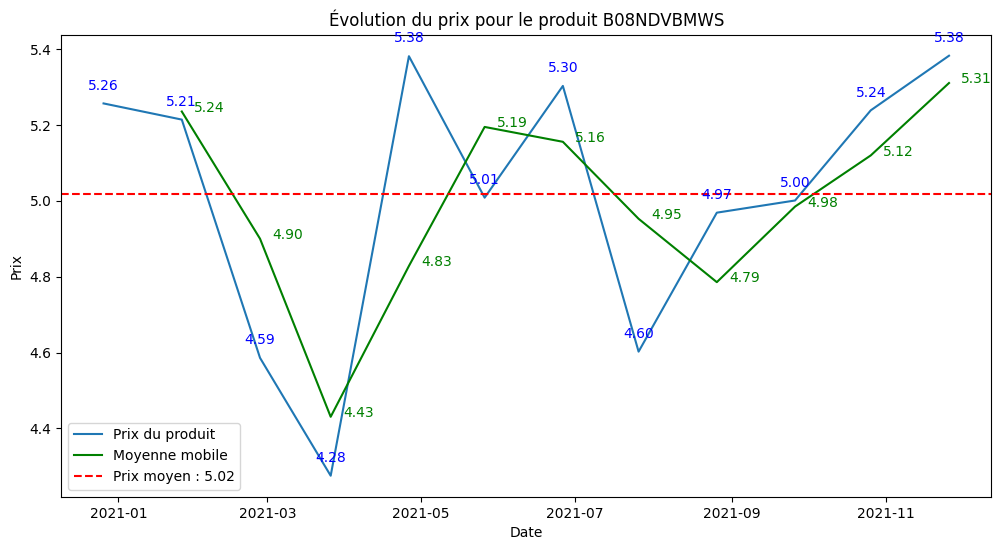

In [77]:
sku = 'B08NDVBMWS'
df_sku = df_final[df_final['Sku'] == sku].copy()

df_sku['Crawl Timestamp'] = pd.to_datetime(df_sku['Crawl Timestamp'])
df_sku = df_sku.sort_values('Crawl Timestamp')

# Calcul de la moyenne mobile 
df_sku['Moving Average'] = df_sku['Product Price'].rolling(window=2).mean()

# Tracé
plt.figure(figsize=(12, 6))
plt.plot(df_sku['Crawl Timestamp'], df_sku['Product Price'], label='Prix du produit')
plt.plot(df_sku['Crawl Timestamp'], df_sku['Moving Average'], color='green', label='Moyenne mobile')

# Ajout dess annotations pour chaque point de prix
for i in range(len(df_sku)):
    plt.annotate(f"{df_sku['Product Price'].iloc[i]:.2f}", 
                 (df_sku['Crawl Timestamp'].iloc[i], df_sku['Product Price'].iloc[i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center',
                 color='blue')

# Ajout dess annotations pour chaque point de la moyenne mobile
for i in range(len(df_sku)):
    if not pd.isna(df_sku['Moving Average'].iloc[i]):  # Vérifier les valeurs NaN
        plt.annotate(f"{df_sku['Moving Average'].iloc[i]:.2f}", 
                     (df_sku['Crawl Timestamp'].iloc[i], df_sku['Moving Average'].iloc[i]), 
                     textcoords="offset points", 
                     xytext=(20, 0), 
                     ha='center', 
                     color='green')

# Ajout du prix moyen comme ligne horizontale
average_price = df_sku['Product Price'].mean()
plt.axhline(average_price, color='red', linestyle='--', label=f'Prix moyen : {average_price:.2f}')

plt.xlabel('Date')
plt.ylabel('Prix')
plt.title(f'Évolution du prix pour le produit {sku}')
plt.legend()
plt.show()
